### Checking for overfitting

In this short notebook we will have a look at the course of the training and testerror checking for overfitting.

First we import the libraries and load a previous model (of course we could have also trained one from scratch).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
from load_mnist import load_data_2d
import cPickle as pickle
with open('data/net1.pickle', 'rb') as f:
    net_pretrain = pickle.load(f)

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 1: GeForce GTX 780


In the list `train_history_` the training history is stored. We display the first 2 entries (epochs) 

In [2]:
net_pretrain.train_history_[0:2]

[{'epoch': 1,
  'train_loss': 2.2275486,
  'valid_accuracy': 0.52590460526315785,
  'valid_loss': 2.0328732},
 {'epoch': 2,
  'train_loss': 1.7507087,
  'valid_accuracy': 0.59642269736842102,
  'valid_loss': 1.46694}]

To get the variables one create a pandas data frame and display the first 5 rows as follows:

In [3]:
import pandas as pd
df = pd.DataFrame(net_pretrain.train_history_)
df[0:5]

,epoch,train_loss,valid_accuracy,valid_loss
0,1,2.227549,0.525905,2.032873
1,2,1.750709,0.596423,1.466940
2,3,1.093071,0.748355,0.937246
3,4,0.680239,0.782484,0.742676
4,5,0.461181,0.803454,0.736124


For plotting we now use a cool programm called R. First we load the R-extension and push the data to R

In [4]:
%load_ext rpy2.ipython
%Rpush df

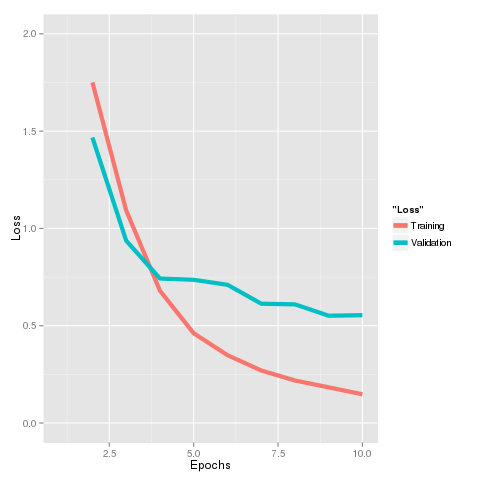

In [6]:
%%R
library(ggplot2)
ggplot(df, aes(x=df$epoch, colour='Loss')) + 
  geom_line(aes(y = df$train_loss, colour='Training'), size=2) + 
  geom_line(aes(y = df$valid_loss, colour='Validation'), size=2) + 
  xlab('Epochs') + ylab('Loss') +
  ylim(c(0,2))

Since we have so little training data, we already see the onset of overfitting.